In [1]:
from scripts.subscripts.SYNCLUS import SYNCLUS
import numpy as np

In [2]:
PTEX_dissim = np.loadtxt("./data/PTEX_DTW_matrix.dat", dtype= np.float64, delimiter = ",")

In [3]:
from scripts.ClusterMetrics import silhouette_score_precomputed, calinski_harabasz_score_precomputed, davies_bouldin_score_precomputed

def GetClusteringMetrics(dissim, Labels):
    SH_score = silhouette_score_precomputed(dissim, Labels)
    CH_score = calinski_harabasz_score_precomputed(dissim, Labels)
    DB_score = davies_bouldin_score_precomputed(dissim, Labels)

    return (SH_score, CH_score, DB_score)

In [4]:
from matplotlib.pyplot import subplots, show

def VisualizeClusterMetrics(metrics_by_num):
    Figure, Subplot = subplots(3, 1, sharex="all", figsize = (7, 7))
    Figure.suptitle("SYNCLUS metrics")

    num_clusters = tuple(metrics_by_num.keys())
    SH, CH, DB = zip(*tuple(metrics_by_num.values()))

    Subplot[0].plot(num_clusters, SH, "-o")
    Subplot[1].plot(num_clusters, CH, "-o")
    Subplot[2].plot(num_clusters, DB, "-o")

    Subplot[2].set_xlabel("# of clusters")
    Subplot[0].set_ylabel("Silhouette Coefficient")
    Subplot[1].set_ylabel("Calinski-Harabasz Index")
    Subplot[2].set_ylabel("Davies-Bouldin Index")

    Figure.tight_layout()

    show()

In [5]:
metrics_by_clusters = dict()
num_iters = 250
num_reps = 50
num_clusters = tuple(range(2, 11))

for k in num_clusters:
    SYNCLUS_VTEC = SYNCLUS(PTEX_dissim, K = k, iter = num_iters, reps = num_reps)
    Labels = SYNCLUS_VTEC.fit_predict()["end_clusters"]
    Metrics = GetClusteringMetrics(PTEX_dissim, Labels)

    metrics_by_clusters[k] = Metrics

100%|██████████| 50/50 [00:16<00:00,  3.05it/s]


Best SYNCLUS at  3 with  2  clusters
Min, Quartiles, Max
211749.09, 235622.48, 391230.45, 450305.77, 544447.53


100%|██████████| 50/50 [00:23<00:00,  2.14it/s]


Best SYNCLUS at  10 with  3  clusters
Min, Quartiles, Max
117555.67, 198505.91, 206462.93, 265638.63, 519239.64


100%|██████████| 50/50 [00:48<00:00,  1.03it/s]


Best SYNCLUS at  0 with  4  clusters
Min, Quartiles, Max
104741.48, 106210.22, 123495.13, 199019.74, 449200.14


100%|██████████| 50/50 [01:37<00:00,  1.94s/it]


Best SYNCLUS at  35 with  5  clusters
Min, Quartiles, Max
93834.94, 94841.87, 105508.02, 163932.88, 288649.35


100%|██████████| 50/50 [01:17<00:00,  1.54s/it]


Best SYNCLUS at  45 with  6  clusters
Min, Quartiles, Max
89244.7, 91003.86, 99599.61, 121597.8, 216140.95


100%|██████████| 50/50 [01:06<00:00,  1.33s/it]


Best SYNCLUS at  23 with  7  clusters
Min, Quartiles, Max
79889.61, 86567.61, 91679.44, 100400.28, 205131.04


100%|██████████| 50/50 [01:30<00:00,  1.80s/it]


Best SYNCLUS at  31 with  8  clusters
Min, Quartiles, Max
75281.2, 79689.24, 87311.78, 96901.09, 208377.52


100%|██████████| 50/50 [01:47<00:00,  2.14s/it]


Best SYNCLUS at  1 with  9  clusters
Min, Quartiles, Max
72969.86, 75868.46, 81003.15, 93432.67, 182572.84


100%|██████████| 50/50 [02:15<00:00,  2.72s/it]


Best SYNCLUS at  7 with  10  clusters
Min, Quartiles, Max
69791.88, 72242.58, 74183.01, 85239.97, 190116.27


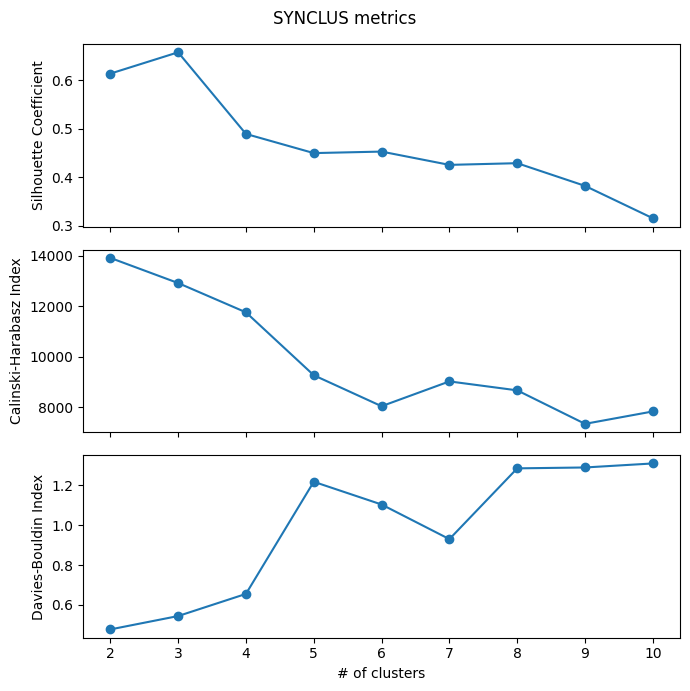

In [6]:
VisualizeClusterMetrics(metrics_by_clusters)

In [7]:
BestLabelsSYNCLUS = SYNCLUS(PTEX_dissim, K = 3, iter = num_iters, reps = num_reps).fit_predict()["end_clusters"]

np.savetxt("./data/PTEX_SYNCLUS_Labels.dat", BestLabelsSYNCLUS.reshape(BestLabelsSYNCLUS.size, 1), fmt = "%d")

100%|██████████| 50/50 [00:31<00:00,  1.57it/s]

Best SYNCLUS at  1 with  3  clusters
Min, Quartiles, Max
117555.67, 187173.24, 199214.69, 282674.5, 513562.29
